In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.lines as mlines
import scipy
import scipy.stats as st
from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
from scipy.stats import spearmanr

## Lecture des fichier csv

In [2]:
df_customers = pd.read_csv("customers.csv")
df_products = pd.read_csv("products.csv")
df_transactions = pd.read_csv("transactions.csv")

In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
df_customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [5]:
df_customers["sex"].unique()

array(['f', 'm'], dtype=object)

In [6]:
df_customers["birth"].unique()

array([1967, 1975, 1984, 1962, 1943, 1993, 1978, 1971, 1982, 1945, 2003,
       1959, 1977, 1954, 1987, 2000, 1992, 1963, 1958, 1994, 1936, 1986,
       1942, 1970, 1957, 1968, 2002, 2004, 1979, 1974, 1964, 1951, 1937,
       1981, 1965, 1960, 1996, 1983, 1990, 1955, 1988, 1991, 1972, 1980,
       1989, 1976, 1985, 1953, 1998, 1956, 1948, 1973, 1969, 1938, 1995,
       1952, 1949, 1999, 2001, 1939, 1950, 1966, 1935, 1941, 1961, 1997,
       1944, 1929, 1947, 1946, 1932, 1931, 1933, 1930, 1940, 1934],
      dtype=int64)

In [7]:
df_customers["birth"].min()

1929

In [8]:
df_customers["birth"].max()

2004

In [9]:
df_customers["client_id"].unique()

array(['c_4410', 'c_7839', 'c_1699', ..., 'c_5119', 'c_5643', 'c_84'],
      dtype=object)

In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
df_products["price"].unique()

array([19.99,  5.13, 17.99, ..., 11.22, 38.56, 25.16])

In [12]:
df_products["price"].min()

-1.0

In [13]:
df_products["price"].max()

300.0

In [14]:
df_products["categ"].unique()

array([0, 1, 2], dtype=int64)

# //

## Netoyage des données

In [15]:
df_products[df_products["price"] <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [16]:
df_products.drop([731], axis= 0, inplace= True)

In [17]:
df_products[df_products["price"] <= 0]

,id_prod,price,categ


In [18]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [19]:
df_transactions["date"].unique()

array(['2022-05-20 13:21:29.043970', '2022-02-02 07:55:19.149409',
       '2022-06-18 15:44:33.155329', ..., '2022-12-20 04:33:37.584749',
       '2021-07-16 20:36:35.350579', '2022-09-28 01:12:01.973763'],
      dtype=object)

In [20]:
df_transactions[pd.isnull(df_transactions["date"])]

,id_prod,date,session_id,client_id


In [21]:
df_transactions.dropna(inplace=True) 

In [22]:
df_transactions[pd.isnull(df_transactions["date"])]

,id_prod,date,session_id,client_id


## Modification du format de la date

In [23]:
df_transactions["date"]= pd.to_datetime(df_transactions["date"],format='%Y/%m/%d', errors='coerce') 

In [24]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679532 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679532 non-null  object        
 3   client_id   679532 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.7+ MB


In [25]:
df_transactions[pd.isnull(df_transactions["date"])]

,id_prod,date,session_id,client_id
3019,T_0,NaT,s_0,ct_0
5138,T_0,NaT,s_0,ct_0
9668,T_0,NaT,s_0,ct_1
10728,T_0,NaT,s_0,ct_0
15292,T_0,NaT,s_0,ct_0
...,...,...,...,...
657830,T_0,NaT,s_0,ct_0
662081,T_0,NaT,s_0,ct_1
670680,T_0,NaT,s_0,ct_1
671647,T_0,NaT,s_0,ct_1


In [26]:
df_transactions["date"].unique()

array(['2022-05-20T13:21:29.043970000', '2022-02-02T07:55:19.149409000',
       '2022-06-18T15:44:33.155329000', ...,
       '2022-12-20T04:33:37.584749000', '2021-07-16T20:36:35.350579000',
       '2022-09-28T01:12:01.973763000'], dtype='datetime64[ns]')

## jointure des fichiers 

In [27]:
df_join = pd.merge(df_products,df_transactions, on="id_prod", how="inner",)

In [28]:
df_join

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389
1,0_1421,19.99,0,2022-11-19 03:42:20.707442,s_299590,c_8364
2,0_1421,19.99,0,2021-09-19 14:58:46.726179,s_92304,c_3544
3,0_1421,19.99,0,2023-01-11 16:04:24.367855,s_325369,c_1025
4,0_1421,19.99,0,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...,...
679106,1_140,38.56,1,2022-06-30 11:10:45.544437,s_231391,c_974
679107,0_1920,25.16,0,2023-01-30 02:37:22.371278,s_334324,c_7748
679108,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088
679109,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748


In [29]:
df_join = pd.merge(df_join,df_customers,on="client_id", how = "inner")

In [30]:
df_join

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991
...,...,...,...,...,...,...,...,...
679106,2_163,68.99,2,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997
679107,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
679108,2_101,63.99,2,2022-12-21 09:11:12.619736,s_315267,c_7089,m,2002
679109,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


In [31]:
# df_join[~pd.isnull(df_join["date"]) & (df_join.price > 0)]

# //

## Calcule du chiffre d'affaire 

In [32]:
ca= round(df_join["price"].sum(),2)
print("le chiffre d'affaire total est de :", ca, "€")

le chiffre d'affaire total est de : 11853728.68 €


In [33]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  int64         
 3   date        679111 non-null  datetime64[ns]
 4   session_id  679111 non-null  object        
 5   client_id   679111 non-null  object        
 6   sex         679111 non-null  object        
 7   birth       679111 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 46.6+ MB


# //

## Evolution du chiffre d'affaire

In [34]:
df_join= df_join.sort_values(by=['date'], ascending=True)

In [35]:
evolution = df_join[["date","price"]]

In [36]:
evolution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 632963 to 136655
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    679111 non-null  datetime64[ns]
 1   price   679111 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.5 MB


## Evolution du chiffre d'affaire par jours 

In [37]:
evolutionparjours = evolution.groupby(pd.Grouper(key='date', freq='d')).sum()

In [38]:
evolutionparjours.reset_index(inplace=True)

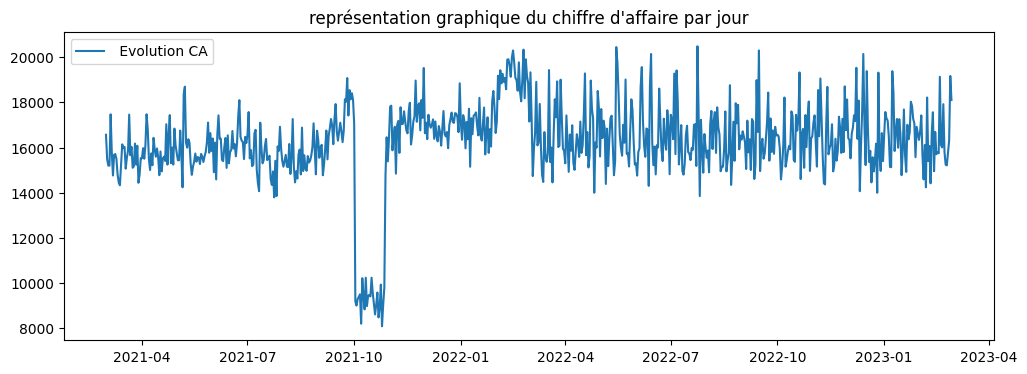

In [39]:
plt.figure(figsize=(12,4))
plt.plot(evolutionparjours["date"],evolutionparjours["price"], label= " Evolution CA")
plt.title("représentation graphique du chiffre d'affaire par jour")
plt.legend()
plt.show()

## Evolution du chiffre d'affaire par mois

In [40]:
evolutionparmois = evolution.groupby(pd.Grouper(key='date', freq='m')).sum()

In [41]:
evolutionparmois.reset_index(inplace=True)

In [42]:
evolutionparmois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    24 non-null     datetime64[ns]
 1   price   24 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 512.0 bytes


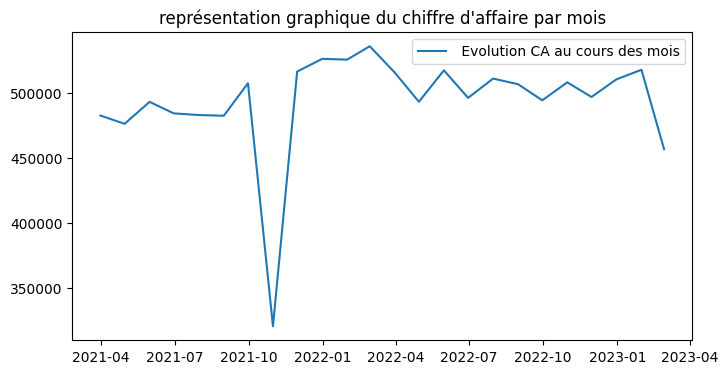

In [43]:
plt.figure(figsize=(8,4))
plt.plot(evolutionparmois["date"],evolutionparmois["price"], label= " Evolution CA au cours des mois")
plt.title("représentation graphique du chiffre d'affaire par mois")
plt.legend()
plt.show()

## Evolution du CA par ans 

In [44]:
evolutionparans = evolution.groupby(evolution.date.dt.year)['price'].agg(['sum'])

Reset index

In [45]:
evolutionparans.reset_index(inplace=True)

In [46]:
evolutionparans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3 non-null      int64  
 1   sum     3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [47]:
evolutionparans

,date,sum
0,2021,4770826.56
1,2022,6108681.81
2,2023,974220.31


In [48]:
evolutionparans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3 non-null      int64  
 1   sum     3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


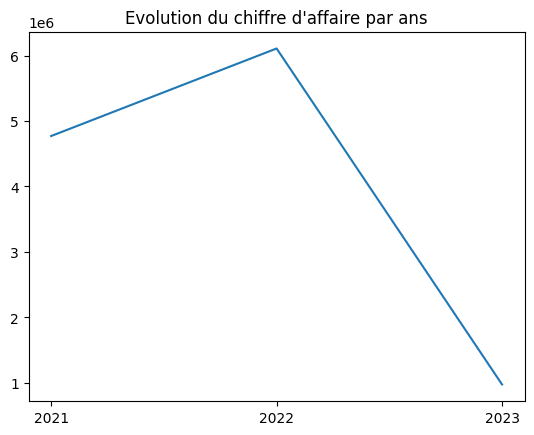

In [49]:
plt.plot(evolutionparans['date'],evolutionparans['sum'])
plt.xticks(evolutionparans.date)
plt.title("Evolution du chiffre d'affaire par ans")
plt.show()

# //

## Decomposition en moyenne mobile du CA

In [50]:
evolutionparmois= evolutionparmois.sort_values(by=['date'], ascending=True)

In [51]:
evolutionparmois

,date,price
0,2021-03-31,482440.61
1,2021-04-30,476109.30
2,2021-05-31,492943.47
3,2021-06-30,484088.56
4,2021-07-31,482835.40
5,2021-08-31,482284.79
6,2021-09-30,507240.68
7,2021-10-31,320798.74
8,2021-11-30,516167.73
9,2021-12-31,525917.28


# Moyenne Mobile 

In [52]:
df_mm = df_join[['date','price']]

In [53]:
# df_mm = df_mm.groupby(df_mm.date.dt.day)['price'].agg(['sum'])

In [54]:
df_mm = df_mm.groupby(pd.Grouper(key='date', freq='d')).sum()

In [55]:
df_mm.reset_index(inplace=True)

In [56]:
df_mm= df_mm.sort_values(by=['date'], ascending=True)

Moyenne mobile simple sur une fenêtre de 7 jours

In [57]:
df_mm['MM7D'] = round(df_mm['price'].rolling(7).mean(),2)

Moyenne mobile simple sur une fenêtre de 30 jours

In [58]:
df_mm['MM30D'] = round(df_mm['price'].rolling(30).mean(),2)

Moyenne mobile simple sur une fenêtre de 90 jours

In [59]:
df_mm['MM90D'] = round(df_mm['price'].rolling(90).mean(),2)

Moyenne mobile cumulé sur une fenêtre de 90 jours

In [60]:
df_mm["MMC90"] = round(df_mm["price"].expanding(min_periods=90).mean(),2)

In [61]:
df_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    730 non-null    datetime64[ns]
 1   price   730 non-null    float64       
 2   MM7D    724 non-null    float64       
 3   MM30D   701 non-null    float64       
 4   MM90D   641 non-null    float64       
 5   MMC90   641 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 39.9 KB


In [62]:
df_mm.head(60)

,date,price,MM7D,MM30D,MM90D,MMC90
0,2021-03-01,16565.22,NaN,NaN,NaN,NaN
1,2021-03-02,15486.45,NaN,NaN,NaN,NaN
2,2021-03-03,15198.69,NaN,NaN,NaN,NaN
3,2021-03-04,15196.07,NaN,NaN,NaN,NaN
4,2021-03-05,17471.37,NaN,NaN,NaN,NaN
5,2021-03-06,15785.28,NaN,NaN,NaN,NaN
6,2021-03-07,14760.20,15780.47,NaN,NaN,NaN
7,2021-03-08,15679.53,15653.94,NaN,NaN,NaN
8,2021-03-09,15710.51,15685.95,NaN,NaN,NaN
9,2021-03-10,15496.87,15728.55,NaN,NaN,NaN


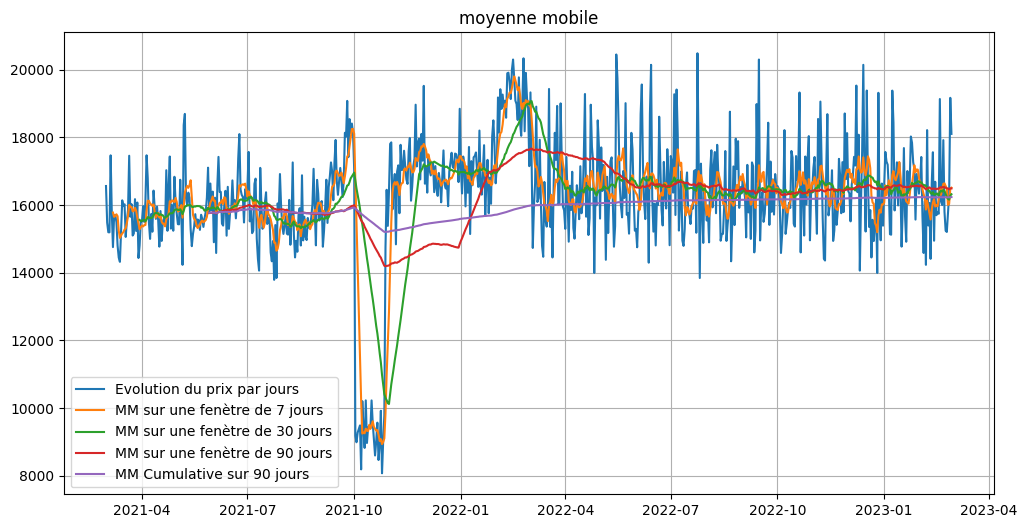

In [63]:
plt.figure(figsize = (12,6))
plt.grid(True)
X = df_mm['date']
Y1 = df_mm["price"]
Y2 = df_mm["MM7D"]
Y3 = df_mm["MM30D"]
Y4 = df_mm["MM90D"]
plt.plot(X, Y1, label = "Evolution du prix par jours")
plt.plot(X,Y2, label = "MM sur une fenètre de 7 jours")
plt.plot(X,Y3,label = "MM sur une fenètre de 30 jours")
plt.plot(X,Y4, label ="MM sur une fenètre de 90 jours")
plt.plot(X,df_mm["MMC90"],label="MM Cumulative sur 90 jours")
plt.legend()
plt.title("moyenne mobile" )
plt.show()

# //

# Référence produits

In [64]:
df_join

,id_prod,price,categ,date,session_id,client_id,sex,birth
632963,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967
273678,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960
55612,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988
209881,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989
293084,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956
...,...,...,...,...,...,...,...,...
181135,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996
269624,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994
532972,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985
254010,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953


## Les top et flop des ventes par produit

In [65]:
df_TopEtFlop= df_join.sort_values(by=['id_prod', 'categ'])

In [66]:
df_TopEtFlop = df_TopEtFlop.groupby(['id_prod','categ'])['price'].agg(['sum']).reset_index()
# df = df.groupby(['id','product'])['quantity'].sum().reset_index()

In [67]:
df_TopEtFlop = df_TopEtFlop.rename(columns={"sum": 'price'})

In [68]:
df_TopEtFlop = df_TopEtFlop.sort_values(by='price', ascending=True)

In [69]:
df_TopEtFlop["categ"].unique()

array([0, 1, 2], dtype=int64)

In [70]:
df_TopEtFlop.loc[df_TopEtFlop['id_prod'].duplicated(keep = False)]

,id_prod,categ,price


In [71]:
df_TopEtFlop

,id_prod,categ,price
595,0_1539,0,0.99
313,0_1284,0,1.38
719,0_1653,0,1.98
665,0_1601,0,1.99
2079,0_807,0,1.99
...,...,...,...
3152,2_209,2,56971.86
3034,2_102,2,60736.78
3045,2_112,2,65407.76
3070,2_135,2,69334.95


In [72]:
df_TopEtFlop["price"].min()

0.99

In [73]:
df_TopEtFlop["price"].max()

94893.5

In [74]:
moyenneCa = round(df_TopEtFlop["price"].mean(),2)
print("la moyenne du chifre d'affaire et de:", moyenneCa)

la moyenne du chifre d'affaire et de: 3630.54


# Les Flop

In [75]:
flop= df_TopEtFlop.sort_values(by = 'price',ascending=True)
flop.head(10)

,id_prod,categ,price
595,0_1539,0,0.99
313,0_1284,0,1.38
719,0_1653,0,1.98
665,0_1601,0,1.99
2079,0_807,0,1.99
1784,0_541,0,1.99
802,0_1728,0,2.27
549,0_1498,0,2.48
2179,0_898,0,2.54
925,0_1840,0,2.56


# Les Top

In [76]:
top= df_TopEtFlop.sort_values(by='price', ascending=False)
top.head(10)


,id_prod,categ,price
3096,2_159,2,94893.50
3070,2_135,2,69334.95
3045,2_112,2,65407.76
3034,2_102,2,60736.78
3152,2_209,2,56971.86
2619,1_395,1,54356.25
2591,1_369,1,54025.48
3043,2_110,2,53846.25
3201,2_39,2,53060.85
3104,2_166,2,52449.12


## //

# Répartiton  du CA par catégorie

## Categ0

In [77]:
categ0 = df_join[df_join['categ']==0][['date','price']]

In [78]:
categ0["date"]= pd.to_datetime(categ0["date"],format='%Y/%m/%d', errors='coerce') 

In [79]:
categ0 = categ0.groupby(pd.Grouper(key='date', freq='m')).sum()

## categ1

In [80]:
categ1 = df_join[df_join['categ']==1][['date','price']]

In [81]:
categ1["date"]= pd.to_datetime(categ1["date"],format='%Y/%m/%d', errors='coerce') 

In [82]:
categ1 = categ1.groupby(pd.Grouper(key='date', freq='m')).sum()

## categ2

In [83]:
categ2 = df_join[df_join['categ']==2][['date','price']]

In [84]:
categ2["date"]= pd.to_datetime(categ2["date"],format='%Y/%m/%d', errors='coerce') 

In [85]:
categ2 = categ2.groupby(pd.Grouper(key='date', freq='m')).sum()

In [86]:
categ2

,price
date,
2021-03-31,101837.27
2021-04-30,114748.49
2021-05-31,130863.35
2021-06-30,126983.37
2021-07-31,149561.34
2021-08-31,151555.79
2021-09-30,70272.99
2021-10-31,87785.59
2021-11-30,107347.78


## Evolution selon catégorie

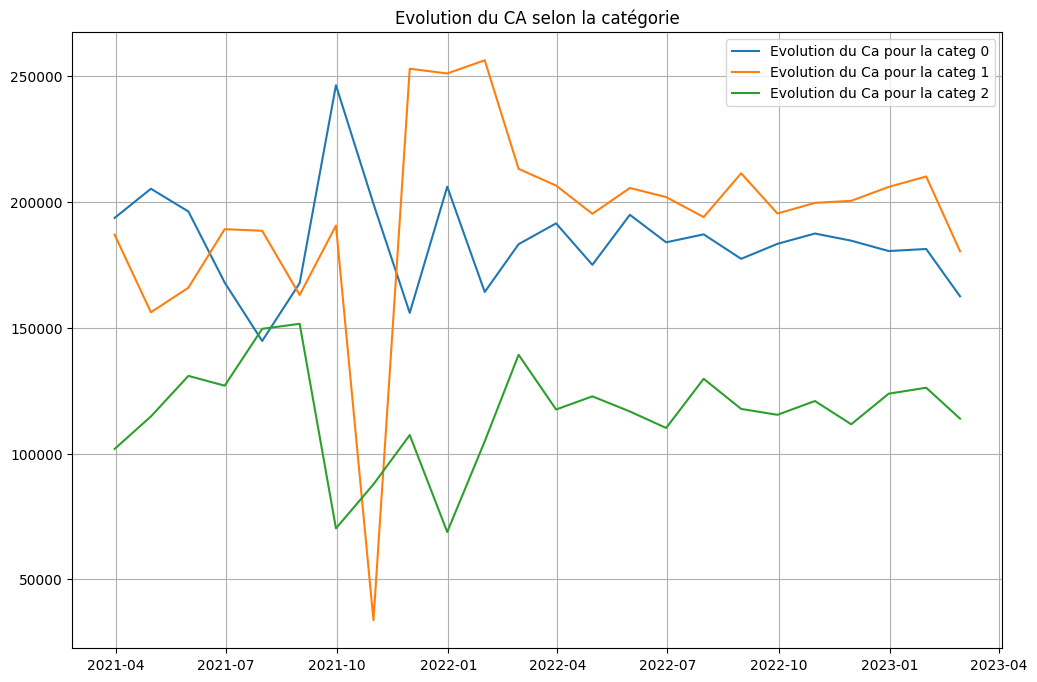

In [87]:
plt.figure(figsize = (12,8))
plt.grid(True)
plt.plot(categ0["price"],label = "Evolution du Ca pour la categ 0")
plt.plot(categ1["price"], label = "Evolution du Ca pour la categ 1")
plt.plot(categ2["price"],label = "Evolution du Ca pour la categ 2")
plt.legend()
plt.title("Evolution du CA selon la catégorie" )
plt.show()
# plt.plot(x,evolution["price"])


In [88]:
categ0birth = df_join[df_join['categ']==0][['price','birth']]

In [89]:
categ0birth.groupby(by='birth').sum()

,price
birth,
1929,716.76
1930,827.55
1931,897.44
1932,1481.93
1933,1432.79
...,...
2000,11937.61
2001,10561.99
2002,11249.66


# //

# je fais un zoom sur la periode de Octobre 2021 

In [90]:
df_filtered_date = df_join.loc[(df_join['date'] >= '2021-10-01')& (df_join['date'] < '2021-11-02')]

In [91]:
df_filtered_date = df_filtered_date[{"price","date"}]

C:\Users\ikram\AppData\Local\Temp\ipykernel_23432\66406517.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_filtered_date = df_filtered_date[{"price","date"}]


In [92]:
df_filtered_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 239586 to 251583
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   price   22534 non-null  float64       
 1   date    22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 528.1 KB


In [93]:
df_filtered_date

,price,date
239586,6.99,2021-10-01 00:00:23.722317
675803,17.41,2021-10-01 00:03:07.095422
53698,19.96,2021-10-01 00:03:16.664480
312868,17.57,2021-10-01 00:06:04.960675
1720,19.99,2021-10-01 00:07:50.987959
...,...,...
621615,72.75,2021-11-01 23:55:16.721985
111051,19.49,2021-11-01 23:56:08.083457
418002,32.99,2021-11-01 23:57:33.516453
665016,13.99,2021-11-01 23:58:01.459234


In [94]:
df_grouped_day = df_filtered_date.groupby(pd.Grouper(key='date', freq='d')).sum()


In [95]:
df_grouped_day

,price
date,
2021-10-01,17058.34
2021-10-02,9182.13
2021-10-03,8993.05
2021-10-04,9279.68
2021-10-05,9390.46
2021-10-06,9490.69
2021-10-07,8191.08
2021-10-08,10207.35
2021-10-09,9425.36


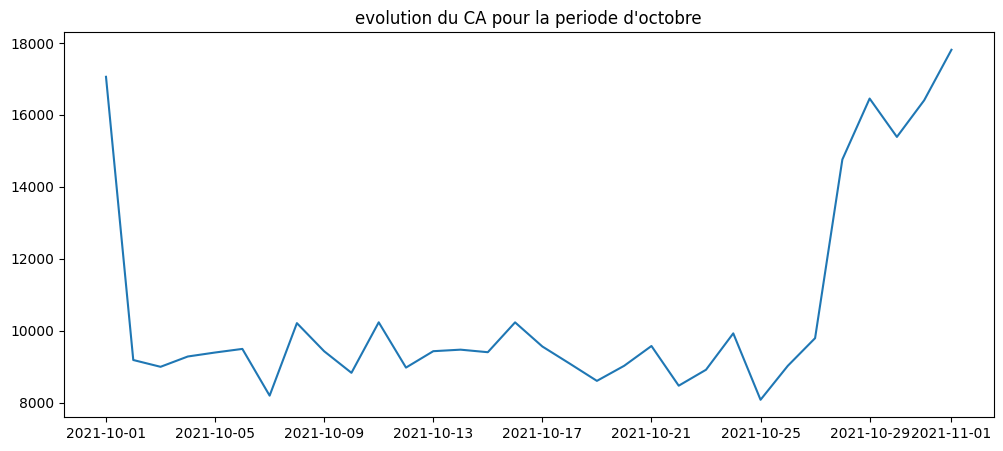

In [96]:
plt.figure(figsize=(12,5))
plt.plot(df_grouped_day["price"])
plt.title("evolution du CA pour la periode d'octobre")
plt.show()

In [97]:
df_filtered_date.max()

price                        247.22
date     2021-11-01 23:58:19.830663
dtype: object

In [98]:
df_filtered_date.min()

price                          0.62
date     2021-10-01 00:00:23.722317
dtype: object

## //

# Fréquence des achats des produits 

In [99]:
grouped_df = df_join.groupby(['date', 'id_prod']).size().reset_index(name="freq")

In [100]:
grouped_df

,date,id_prod,freq
0,2021-03-01 00:01:07.843138,0_1259,1
1,2021-03-01 00:02:26.047414,0_1390,1
2,2021-03-01 00:02:38.311413,0_1352,1
3,2021-03-01 00:04:54.559692,0_1458,1
4,2021-03-01 00:05:18.801198,0_1358,1
...,...,...,...
679106,2023-02-28 23:49:03.148402,1_508,1
679107,2023-02-28 23:51:29.318531,2_37,1
679108,2023-02-28 23:53:18.929676,1_695,1
679109,2023-02-28 23:58:00.107815,0_1547,1


## Freq des achats

In [101]:
df_freq =df_join.groupby([ 'id_prod','price']).size().reset_index(name="freq")

In [102]:
df_freq

,id_prod,price,freq
0,0_0,3.75,1242
1,0_1,10.99,487
2,0_10,17.95,22
3,0_100,20.60,3
4,0_1000,6.84,432
...,...,...,...
3260,2_95,98.99,4
3261,2_96,47.91,598
3262,2_97,160.99,13
3263,2_98,149.74,1


In [103]:
df_freq.loc[df_freq['id_prod'].duplicated(keep = False)]

,id_prod,price,freq


In [104]:
freq_achat_mean = round(df_freq["freq"].mean(),2)

In [105]:
print("Sur les 3 année la fréquence des achats en moyenne est de:", freq_achat_mean)

Sur les 3 année la fréquence des achats en moyenne est de: 208.0


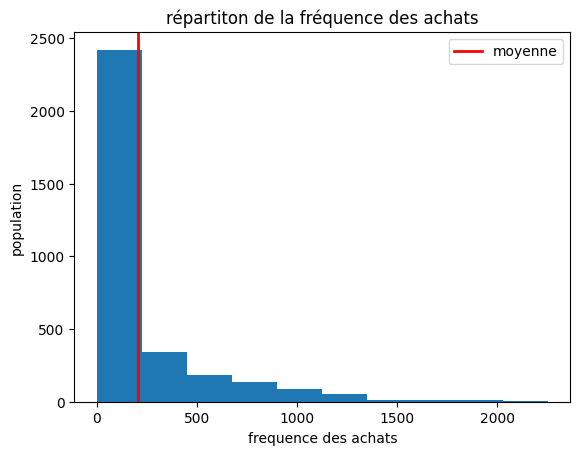

In [106]:
fig, ax= plt.subplots()
ax.hist(df_freq["freq"])
plt.axvline(df_freq["freq"].mean(), color='red', linewidth=2, label="moyenne")
ax.set_ylabel('population')
ax.set_xlabel('frequence des achats')
plt.title("répartiton de la fréquence des achats")
plt.legend()

2400 des produit en une fréquence d'achat inferieur a 208

## Fréquence des achats par ans

# 2021

In [107]:
grouped_df_2021 = grouped_df[grouped_df["date"] < "2022-01-01" ]

In [108]:
grouped_df_2021 = grouped_df_2021.groupby(['id_prod']).size().reset_index(name="freq")

In [109]:
grouped_df_2021.loc[grouped_df_2021['id_prod'].duplicated(keep = False)]

,id_prod,freq


In [110]:
grouped_df_2021

,id_prod,freq
0,0_0,526
1,0_1,207
2,0_10,11
3,0_100,2
4,0_1000,188
...,...,...
3248,2_95,1
3249,2_96,231
3250,2_97,3
3251,2_98,1


In [111]:
grouped_df_2021["freq"].mean()

85.53581309560406

In [112]:
grouped_df_2021.min()

id_prod    0_0
freq         1
dtype: object

In [113]:
grouped_df_2021.max()

id_prod    2_99
freq        847
dtype: object

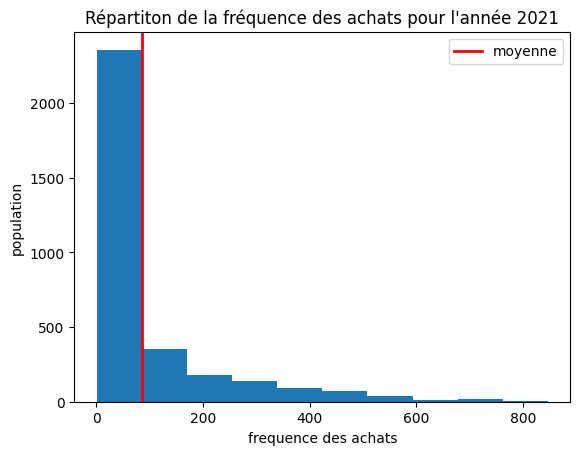

In [114]:
fig, ax=plt.subplots()
ax.hist(grouped_df_2021["freq"])
plt.axvline(grouped_df_2021["freq"].mean(), color='red', linewidth=2, label="moyenne")
ax.set_ylabel('population')
ax.set_xlabel('frequence des achats')
plt.title("Répartiton de la fréquence des achats pour l'année 2021")
plt.legend()

2400 des des produit en une fréquence d'achats inférieur à 85 

# 2022

In [115]:
grouped_df_2022 = grouped_df[(grouped_df["date"] > "2021-12-31") & (grouped_df["date"] < "2023-01-01")]

In [116]:
grouped_df_2022 = grouped_df_2022.groupby(['id_prod']).size().reset_index(name="freq")

In [117]:
grouped_df_2022.loc[grouped_df_2022['id_prod'].duplicated(keep = False)]

,id_prod,freq


In [118]:
grouped_df_2022.min()

id_prod    0_0
freq         1
dtype: object

In [119]:
grouped_df_2022.max()

id_prod    2_99
freq       1203
dtype: object

In [120]:
grouped_df_2022["freq"].mean()

107.94596273291926

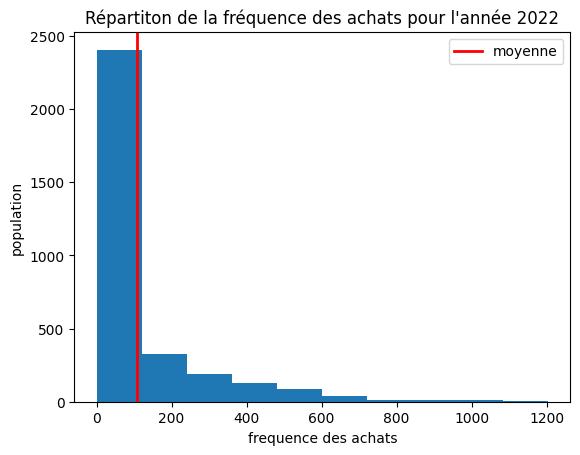

In [121]:
fiq, ax = plt.subplots()
ax.hist(grouped_df_2022["freq"])
plt.axvline(grouped_df_2022["freq"].mean(), color='red', linewidth=2, label="moyenne")
ax.set_ylabel('population')
ax.set_xlabel('frequence des achats')
plt.title("Répartiton de la fréquence des achats pour l'année 2022")
plt.legend()

2400 des produit en une fréquence d'achat inférieur à 100

# 2023

In [122]:
grouped_df_2023 = grouped_df[(grouped_df["date"] > "2022-12-31") & (grouped_df["date"] < "2024-01-01")]

In [123]:
grouped_df_2023 = grouped_df_2023.groupby(['id_prod']).size().reset_index(name="freq")

In [124]:
grouped_df_2023.loc[grouped_df_2023['id_prod'].duplicated(keep = False)]

,id_prod,freq


In [125]:
grouped_df_2023.min()

id_prod    0_0
freq         1
dtype: object

In [126]:
grouped_df_2023.max()

id_prod    2_99
freq        208
dtype: object

In [127]:
grouped_df_2023.mean()

id_prod          inf
freq       19.736429
dtype: float64

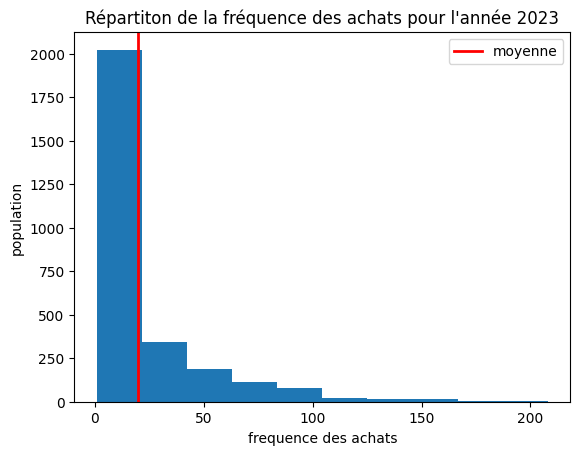

In [128]:
fig, ax = plt.subplots()
ax.hist(grouped_df_2023["freq"])
plt.axvline(grouped_df_2023["freq"].mean(), color='red', linewidth=2, label="moyenne")
ax.set_ylabel('population')
ax.set_xlabel('frequence des achats')
plt.title("Répartiton de la fréquence des achats pour l'année 2023")
plt.legend()

2000 des produit en une fréquence d'achat inférieur a 20

# Fréquence des achats pour les 3 année

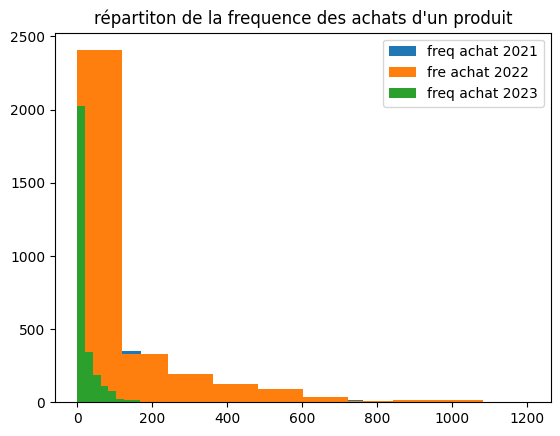

In [129]:
plt.hist(grouped_df_2021["freq"], label="freq achat 2021")
# plt.axvline(grouped_df_2021["freq"].mean(), color='red', linewidth=2, label="moyenne 2021")
plt.hist(grouped_df_2022["freq"], label= "fre achat 2022")
# plt.axvline(grouped_df_2022["freq"].mean(), color='black', linewidth=2, label="moyenne 2022")
plt.hist(grouped_df_2023["freq"], label= "freq achat 2023")
# plt.axvline(grouped_df_2023["freq"].mean(), color='blue', linewidth=2, label="moyenne 2023")
plt.legend()
plt.title("répartiton de la frequence des achats d'un produit")
plt.show()

On voit que la fréquence des achats est la même pour l'année 2021, 2022
pour l'année 2023 nous n'avons pas assez de données on ne peut pas réellement ce prononcé 

# //

# Information sur les profils clients

In [130]:
df_join

,id_prod,price,categ,date,session_id,client_id,sex,birth
632963,0_1259,11.99,0,2021-03-01 00:01:07.843138,s_1,c_329,f,1967
273678,0_1390,19.37,0,2021-03-01 00:02:26.047414,s_2,c_664,m,1960
55612,0_1352,4.50,0,2021-03-01 00:02:38.311413,s_3,c_580,m,1988
209881,0_1458,6.55,0,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989
293084,0_1358,16.49,0,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956
...,...,...,...,...,...,...,...,...
181135,1_508,21.92,1,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996
269624,2_37,48.99,2,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994
532972,1_695,26.99,1,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985
254010,0_1547,8.99,0,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953


## Répartiton des client seulon l'age 

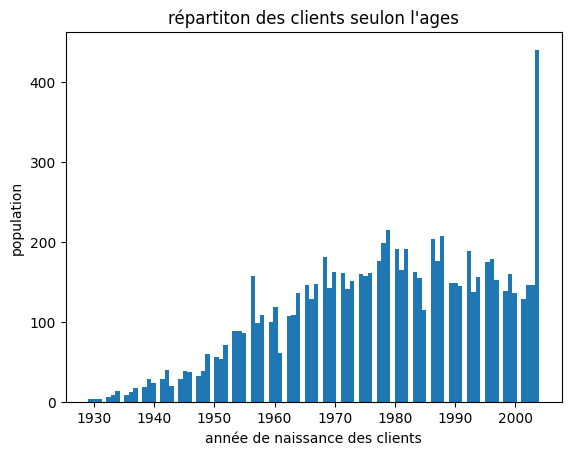

In [131]:
fig, ax = plt.subplots()
ax.hist(df_customers["birth"],bins=(100))
ax.set_ylabel('population')
ax.set_xlabel('année de naissance des clients')
plt.title("répartiton des clients seulon l'ages")
plt.show()

La majeure partie des clients en  18 ans qui est l'âge légal pour pouvoir s'inscrire sur le site
on peut en déduire que beaucoup de client ne donne pas leur vrai âges 

## j'isole les colonnes d'ont j'ai besoin pour les infos clients

In [132]:
df_client  = df_join[["id_prod","price","client_id","sex","birth"]]

In [133]:
df_grouped_client = df_client.groupby(["client_id","birth","sex"])["price"].agg(["sum"])

In [134]:
df_grouped_client.reset_index(inplace=True)

je vérifie que le client id est bien unique non dupliquer

In [135]:
df_grouped_client.loc[df_grouped_client['client_id'].duplicated(keep = False)]

,client_id,birth,sex,sum


In [136]:
df_grouped_client

,client_id,birth,sex,sum
0,c_1,1955,m,558.18
1,c_10,1956,m,1353.60
2,c_100,1992,m,254.85
3,c_1000,1966,f,2261.89
4,c_1001,1982,m,1812.86
...,...,...,...,...
8595,c_995,1955,m,189.41
8596,c_996,1970,f,1625.58
8597,c_997,1994,f,1490.01
8598,c_998,2001,m,2779.88


In [137]:
df_grouped_client["client_id"].unique()

array(['c_1', 'c_10', 'c_100', ..., 'c_997', 'c_998', 'c_999'],
      dtype=object)

In [138]:
x_max = df_grouped_client["sum"].max()

In [139]:
x_min = df_grouped_client["sum"].min()

moyenne de l'échantillons

In [140]:
m = round(df_grouped_client["sum"].mean(),2)
m

1378.34

ecart_type de l'échantillons

In [141]:
std = round(df_grouped_client["sum"].std(),2)
std

5182.54

Variance de l'échantillons

In [142]:
v = round(df_grouped_client["sum"].var(),2)
v

26858746.64

# Test statistique

## Test de normalité

Adéquation de la répartiton du chiffre d'affaire à une loi normale ?

In [143]:
ks_2samp(df_grouped_client['sum'], list(np.random.normal(np.mean(df_grouped_client['sum']),np.std(df_grouped_client['sum']),1000)))

KstestResult(statistic=0.3762093023255814, pvalue=5.112300298546314e-114, statistic_location=28.597025967649188, statistic_sign=-1)

pvalue < alpha on peut rejeter l'hypothèse de normalité au niveau de test 5%

## Répartition CA seulon l'age 

In [144]:
df_grouped_client_age = df_client.groupby(["birth"])["price"].agg(["sum"])

In [145]:
df_grouped_client_age.reset_index(inplace=True)

In [146]:
df_grouped_client_age

,birth,sum
0,1929,3221.85
1,1930,4013.87
2,1931,2815.45
3,1932,5043.19
4,1933,5254.35
...,...,...
71,2000,165007.98
72,2001,178497.70
73,2002,184177.35
74,2003,178195.78


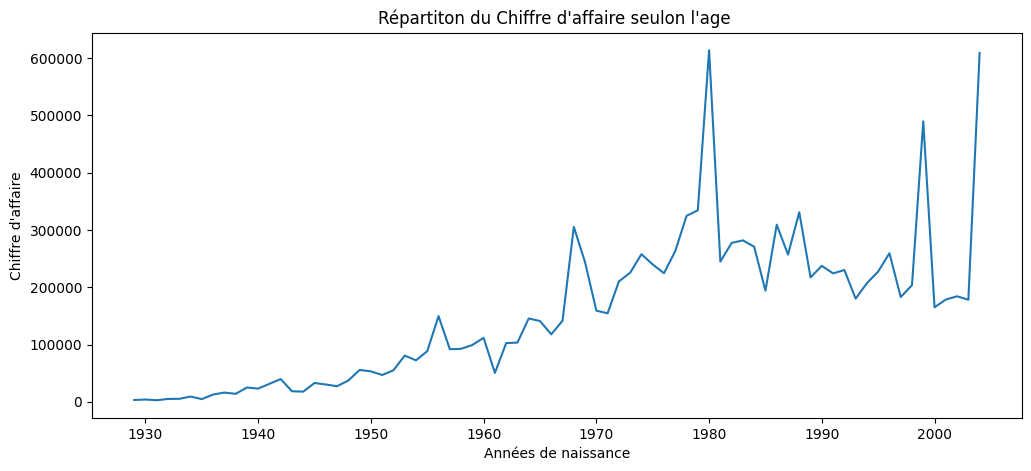

In [147]:
fig, ax = plt.subplots()
ax.plot(df_grouped_client_age["birth"],df_grouped_client_age["sum"])
plt.title("Répartiton du Chiffre d'affaire seulon l'age ")
fig.set_size_inches(12,5)
ax.set_xlabel("Années de naissance")
ax.set_ylabel("Chiffre d'affaire")
plt.show()

h0 = répartition homogène du chiffre d'affaire 

In [148]:
ks_2samp(df_grouped_client_age['sum'], list(np.random.normal(np.mean(df_grouped_client_age['sum']),np.std(df_grouped_client_age['sum']),1000)))

KstestResult(statistic=0.122, pvalue=0.2238190054506116, statistic_location=2419.9735306332295, statistic_sign=-1)

P_value > alpha, on ne peut pas rejeter lhypothèse de l'adéquation a une loi normal 

Test de spearman

In [149]:
st.spearmanr(df_grouped_client_age['sum'],df_grouped_client_age['birth'])

SignificanceResult(statistic=0.8576076555023923, pvalue=4.5797287934090096e-23)

P_value > alpha rejet de h0

## Répartion du chiffre d'affaire entre les clients

In [150]:
df_grouped_client_age.sort_values(by='sum', ascending=True, inplace=True)

In [151]:
X = df_grouped_client_age["sum"]
X_lorenz = X.cumsum() / X.sum()

In [152]:
X_lorenz

2     0.000238
0     0.000509
1     0.000848
6     0.001252
3     0.001678
        ...   
59    0.827363
50    0.855562
70    0.896857
75    0.948234
51    1.000000
Name: sum, Length: 76, dtype: float64

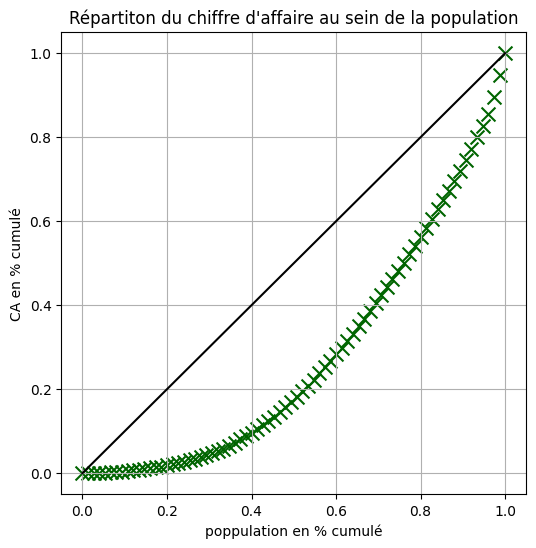

In [153]:
ig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
        marker='x', color='darkgreen', s=100)
## line plot of equality
ax.plot([0,1], [0,1], color='k')
plt.title("Répartiton du chiffre d'affaire au sein de la population")
ax.set_ylabel("CA en % cumulé")
ax.set_xlabel("poppulation en % cumulé")
plt.grid()
plt.show()

Nous avons 60% de la population qui possède 30% du chiffre d'affaire et 40% de la population qui possède 70% du chiffre d'affaire 

Coeficient de gini

In [154]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [155]:
gini(df_grouped_client_age['sum'])

C:\Users\ikram\AppData\Local\Temp\ipykernel_23432\831906128.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i, xi in enumerate(x[:-1], 1):
C:\Users\ikram\AppData\Local\Temp\ipykernel_23432\831906128.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  total += np.sum(np.abs(xi - x[i:]))


0.4479334289454191

# Relation entre âge et fréquence des achats

In [156]:
df_relation = df_join.groupby(['birth']).size().reset_index(name="freq")

In [157]:
df_relation

,birth,freq
0,1929,201
1,1930,226
2,1931,170
3,1932,311
4,1933,326
...,...,...
71,2000,4413
72,2001,4252
73,2002,4584
74,2003,4371


Test de normalité

In [158]:
ks_2samp(df_relation["freq"], list(np.random.normal(np.mean(df_relation["freq"]),np.std(df_relation["freq"]),1000)))

KstestResult(statistic=0.22394736842105264, pvalue=0.001355245806664896, statistic_location=6132.0, statistic_sign=1)

Rejet de l'hypothése de normalité

Nous avons deux variable quantitative (test pearson)

In [159]:
corr= pearsonr(df_relation["birth"], df_relation["freq"])

In [160]:
corr

PearsonRResult(statistic=0.5337344271238336, pvalue=6.87667747034344e-07)

P_value < alpha, je peux rejeter l'hypothèse de la relation age , freq des achat au niveau de teste 0.05

# Relation categ sex

In [161]:
df_sex_categ = df_join[["categ","sex"]]

In [162]:
df_sex_categ_freq = df_sex_categ.groupby(["categ","sex"]).size().reset_index(name="freq")

In [163]:
df_sex_categ_freq

,categ,sex,freq
0,0,f,206103
1,0,m,209356
2,1,f,114899
3,1,m,112270
4,2,f,17283
5,2,m,19200


In [164]:
df_sex_categ_m = df_sex_categ_freq[df_sex_categ_freq["sex"] == "m"]

In [165]:
df_sex_categ_f = df_sex_categ_freq[df_sex_categ_freq["sex"] == "f"]

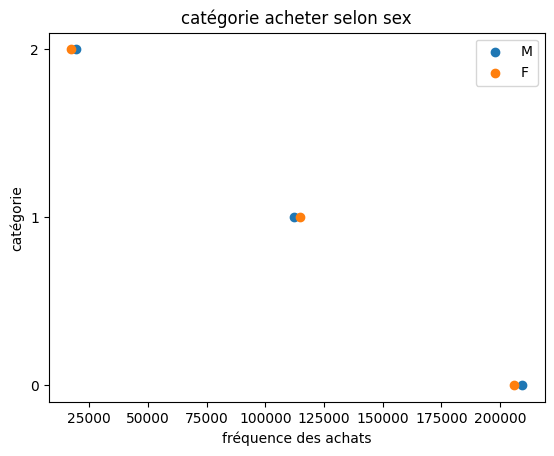

In [166]:
Y = [0,1,2]
fig, ax = plt.subplots()
ax.scatter(df_sex_categ_m["freq"],Y, label="M")
ax.scatter(df_sex_categ_f["freq"], Y,label="F")
plt.yticks(Y)
plt.title("catégorie acheter selon sex")
ax.set_ylabel("catégorie")
ax.set_xlabel('fréquence des achats')
plt.legend()
plt.show()


Nous avons deux variable qualitative (test khi2)

In [167]:
crosstab_sex_categ = pd.crosstab(df_sex_categ["sex"], df_sex_categ["categ"])

In [168]:
crosstab_sex_categ

categ,0,1,2
sex,,,
f,206103,114899,17283
m,209356,112270,19200


In [169]:
st.chi2_contingency(crosstab_sex_categ)

Chi2ContingencyResult(statistic=147.11906816131497, pvalue=1.1310980597090762e-32, dof=2, expected_freq=array([[206952.24759281, 113159.50583189,  18173.2465753 ],
       [208506.75240719, 114009.49416811,  18309.7534247 ]]))

on obtien une p_valeur < alpha  on peut rejeter l'hypothèse de relation entre le sex et la catégorie des achats a un niveu de test 5%

# Relation categ ages

hypothèse a H0 = relation entre l'age est la catégorie

In [170]:
df_categ_age = df_join[["birth","categ"]]

Test d'homogénéité des variances

In [171]:
st.bartlett(df_categ_age["birth"],df_categ_age["categ"])

BartlettResult(statistic=3308828.9262794107, pvalue=0.0)

Je vérifie a nouveau l'homogénité des variance avec un test de leven pour vérifier que j'obtien bien la même P-value

In [172]:
from scipy.stats import levene

In [173]:
st, p = levene(df_categ_age["birth"],df_categ_age["categ"])

In [174]:
p

0.0

P_value < alpha rejet de l'hypothèse de l'homogénéité des variance 

nous avons deux variable  de type quanti/quali, nous rejeton l'égalité des variance est donc du teste paramètrique. Nous allons utilisé un test non paramètrique 

test de kolmogorov smirnov

In [175]:
stats.ks_2samp(df_categ_age["birth"],df_categ_age["categ"])

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2, statistic_sign=-1)

je vérifie que j'obtien bien la même valeur P-value avec un test de Wilcoxon

In [176]:
stats.wilcoxon(df_categ_age["birth"],df_categ_age["categ"])

WilcoxonResult(statistic=0.0, pvalue=0.0)

pvalue < alpha(0.05) , on peut rejeter l'hypothèse de la relation entre l'age est la catégorie 

# Relation ages montant achat et freq achat

In [177]:
df_age_montant = df_join[["birth","price"]]

In [178]:
df_age_montant = df_age_montant.groupby("birth").sum()

In [179]:
df_age_montant.reset_index(inplace=True)

In [180]:
df_age_montant_freq = pd.merge(df_relation,df_age_montant, on="birth", how="inner",)

In [181]:
df_age_montant_freq

,birth,freq,price
0,1929,201,3221.85
1,1930,226,4013.87
2,1931,170,2815.45
3,1932,311,5043.19
4,1933,326,5254.35
...,...,...,...
71,2000,4413,165007.98
72,2001,4252,178497.70
73,2002,4584,184177.35
74,2003,4371,178195.78


Représentation graphique du montant des achat et de la fréquence des achat selon l'age 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


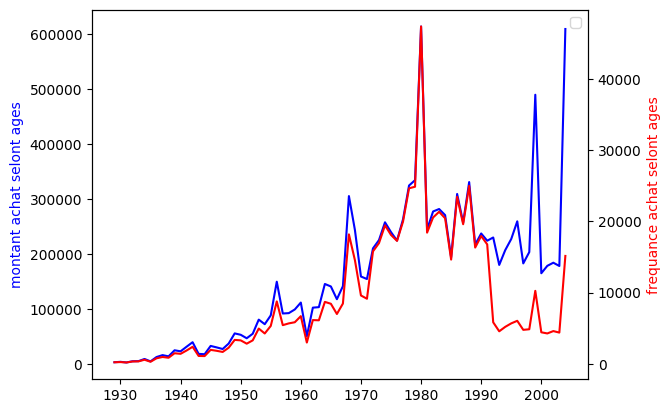

In [182]:
fig, ax1 = plt.subplots()
X =df_age_montant_freq["birth"] 
Y1 = df_age_montant_freq["price"]
ax1.plot(X,Y1,'b')
ax1.set_ylabel('montant achat selont ages', color='b')

ax2 = ax1.twinx()
Y2 = df_age_montant_freq["freq"]
ax2.plot(X,Y2,'r')
ax2.set_ylabel('frequance achat selont ages', color='r')  
plt.legend()
plt.show()

## Boite a moustache 

{'whiskers': [<matplotlib.lines.Line2D at 0x258826a2a40>,
 'caps': [<matplotlib.lines.Line2D at 0x258826a1b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x25883790070>,
 'medians': [<matplotlib.lines.Line2D at 0x258826a2e60>,
 'fliers': [<matplotlib.lines.Line2D at 0x25882b0f5b0>,
 'means': []}

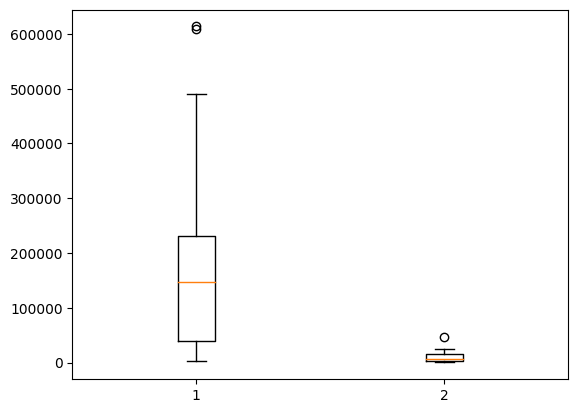

In [183]:
data = [df_age_montant_freq["price"],df_age_montant_freq["freq"]]
plt.boxplot(data)

## Age/montant

<BarContainer object of 76 artists>

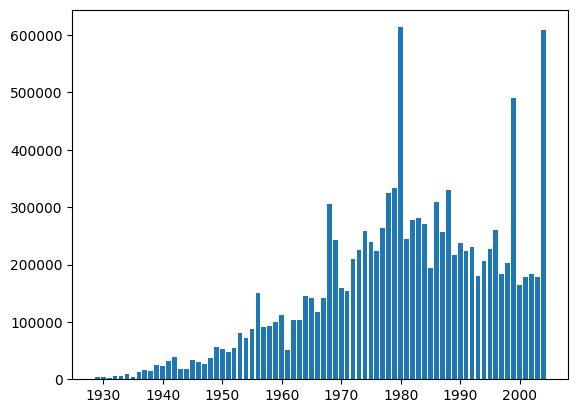

In [184]:
plt.bar(df_age_montant_freq["birth"],df_age_montant_freq["price"])

Variable quanti / quanti 

Test de Normalité

In [185]:
ks_2samp(df_age_montant_freq["price"], list(np.random.normal(np.mean(df_age_montant_freq["price"]),np.std(df_age_montant_freq["price"]),1000)))

KstestResult(statistic=0.13, pvalue=0.16735885303900852, statistic_location=2286.0489446608117, statistic_sign=-1)

P_value > alpha , on ne peut pas rejeter l'hypothèse de la normalité 

## Test de Spearman

In [186]:
sp = spearmanr(df_age_montant_freq["birth"], df_age_montant_freq["price"])

In [187]:
sp

SignificanceResult(statistic=0.8576076555023923, pvalue=4.5797287934090096e-23)

p< alpha  pour le teste à 0.05  on peut  rejeter l'hypothèse de relation entre montant achat et l'age

## Age/freq

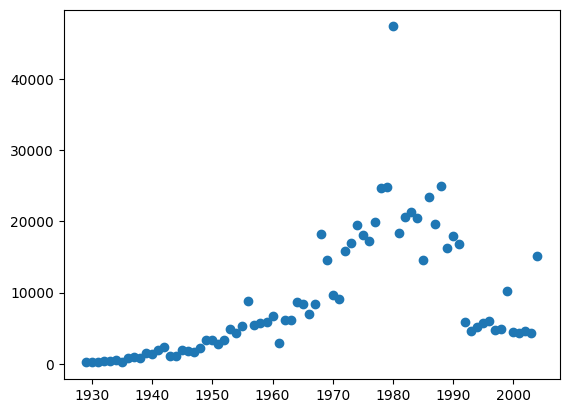

In [188]:
plt.scatter(df_age_montant_freq["birth"],df_age_montant_freq["freq"])

In [189]:
ks_2samp(df_age_montant_freq["freq"], list(np.random.normal(np.mean(df_age_montant_freq["freq"]),np.std(df_age_montant_freq["freq"]),1000)))

KstestResult(statistic=0.20394736842105263, pvalue=0.004698589226415753, statistic_location=6132.0, statistic_sign=1)

Rejet de l'hypothèse de normalité

In [190]:
corr_freq= pearsonr(df_age_montant_freq["birth"], df_age_montant_freq["freq"])

In [191]:
corr_freq

PearsonRResult(statistic=0.5337344271238336, pvalue=6.87667747034344e-07)

P_value < alpha, rejet de l'hypothèse de relation entre fréquence des achats est l'age

## Courbe de Lorenz fréquence des achats

In [192]:
df_age_montant_freq.sort_values(by = 'freq',ascending=True, inplace=True)

In [193]:
Y= df_age_montant_freq["freq"]
Y_lorenz = Y.cumsum() / Y.sum()

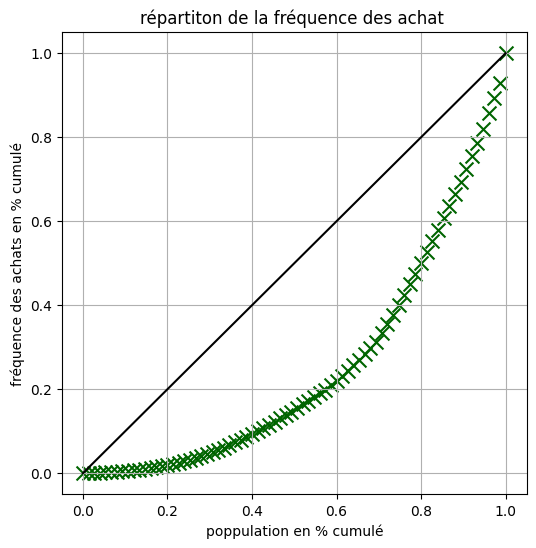

In [194]:
ig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
        marker='x', color='darkgreen', s=100)
## line plot of equality
ax.plot([0,1], [0,1], color='k')
plt.title("répartiton de la fréquence des achat ")
ax.set_ylabel('fréquence des achats en % cumulé')
ax.set_xlabel('poppulation en % cumulé')
plt.grid()
plt.show()

60% de la population possède 20% de la fréquence des achats et 80% de la fréquence des achats est possèdè par 40% de la population 

In [195]:
gini(df_age_montant_freq["freq"])

C:\Users\ikram\AppData\Local\Temp\ipykernel_23432\831906128.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i, xi in enumerate(x[:-1], 1):
C:\Users\ikram\AppData\Local\Temp\ipykernel_23432\831906128.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  total += np.sum(np.abs(xi - x[i:]))


0.5001702109158344

In [196]:
df_freq

,id_prod,price,freq
0,0_0,3.75,1242
1,0_1,10.99,487
2,0_10,17.95,22
3,0_100,20.60,3
4,0_1000,6.84,432
...,...,...,...
3260,2_95,98.99,4
3261,2_96,47.91,598
3262,2_97,160.99,13
3263,2_98,149.74,1


#  //

# Montant panier moyen 

In [197]:
df_grouped_client.loc[df_grouped_client['client_id'].duplicated(keep = False)]

,client_id,birth,sex,sum


In [198]:
df_montantpanier = df_grouped_client[["birth","sum"]]

In [199]:
df_montantpanier['sum'].mean()

1378.3405441860464

In [200]:
df_montantpaniersup = df_montantpanier[df_montantpanier['sum'] >= 50000]

In [201]:
df_montantpanierinf = df_montantpanier[df_montantpanier['sum'] < 50000]

In [202]:
df_montantpaniersup

,birth,sum
677,1980,324033.35
2724,1969,113637.93
4388,1999,289760.34
6337,1968,153598.92


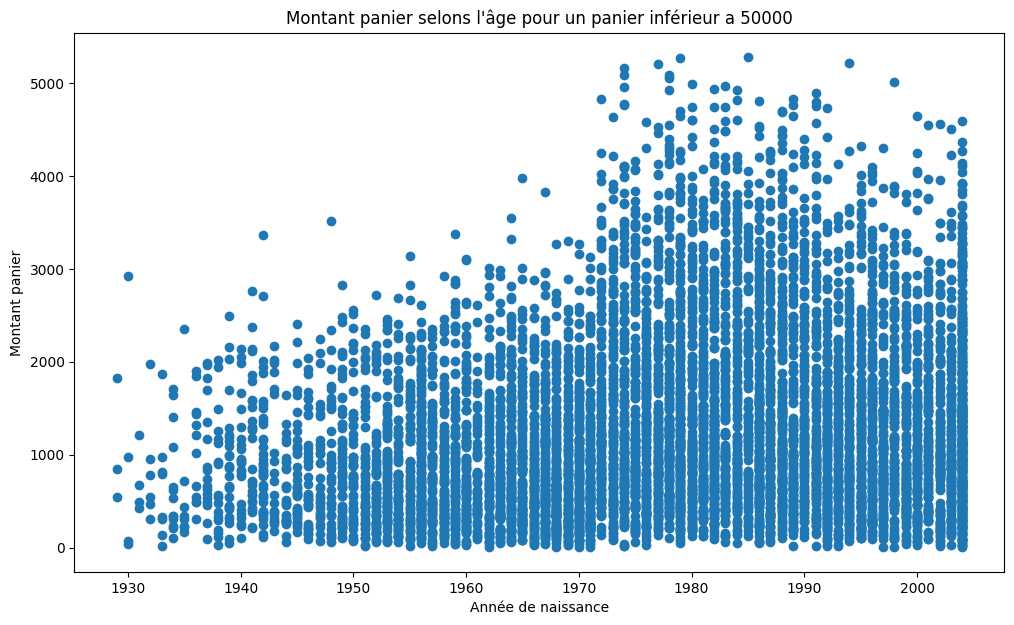

In [203]:
fig, ax = plt.subplots()
ax.scatter(df_montantpanierinf['birth'],df_montantpanierinf["sum"])
fig.set_size_inches(12,7)
plt.title("Montant panier selons l'âge pour un panier inférieur a 50000")
ax.set_xlabel('Année de naissance')
ax.set_ylabel('Montant panier')
plt.show()


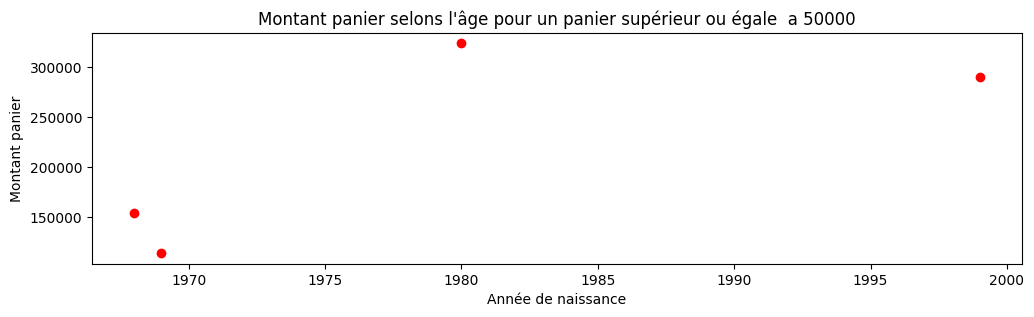

In [204]:
fig, axe = plt.subplots()
axe.scatter(df_montantpaniersup['birth'],df_montantpaniersup['sum'],color = 'r')
fig.set_size_inches(12,3)
axe.set_xlabel('Année de naissance')
axe.set_ylabel('Montant panier')
plt.title("Montant panier selons l'âge pour un panier supérieur ou égale  a 50000")
plt.show()

Text(0.5, 1.0, "boite a moustache 'montant panier'")

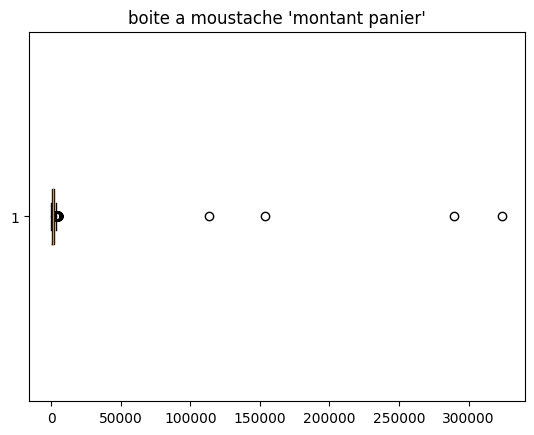

In [205]:
fig, axs = plt.subplots()
axs.boxplot(df_montantpanier["sum"],vert = False)
plt.title("boite a moustache 'montant panier'")
# plt.boxplot(df_montantpanier["sum"])